# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW2 - Multilayer NNs and Convolutional NNs
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Student 1| student_1@campus.technion.ac.il| 123456789|
|Student 2| student_2@campus.technion.ac.il| 987654321|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw2_id1_id2.ipynb`.
    * If you answered the questions in a different file you should submit a `.zip` file with the name `ece046211_hw2_id1_id2.zip` with content:
        * `ece046211_hw2_id1_id2.ipynb` - the code tasks.
        * `ece046211_hw2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw2` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Generalization in A Teacher-Student Setup](#-Question-1--Generalization-in-A-Teacher-Student-Setup)
    * [Q2 - "Typical" Generalization in Multilayer Neural Networks](#-Question-2---"Typical"-Generalization-in-Multilayer-Neural-Networks)
    * [Q3 - Deep Double Descent](#-Question-3---Deep-Double-Descent)
    * [Q4 - Initialization](#-Question-4---Initialization)
    * [Q5 - Invariance and Equivariance](#-Question-5---Invariance-and-Equivariance)
    * [Q6 - VGG Architecture](#-Question-6--VGG-Architecture)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Importance of Activation and Initialization](#-Task-1---The-Importance-of-Activation-and-Initialization)
    * [Task 2 - MLP-based Deep Classifer](#-Task-2---MLP-based-Deep-Classifer)
    * [Task 3 - Design a CNN](#-Task-3---Design-a-CNN)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Generalization in A Teacher-Student Setup
---

Recall from lecture 4 the Bayes Risk $\mathcal{\overline{R}}(w)$: $$ \mathcal{\overline{R}}(w) \triangleq \mathbb{E}_{\epsilon \sim \mathcal{N}(0, \sigma_{\epsilon}^2I), w_{true} \sim \mathcal{N}(0,\frac{\sigma_w^2}{d}I) } \left[\mathcal{R}\right], $$ where, $$ \mathcal{R}(w_{\mu}) = ||w_{\mu}-w_{true}||^2 = ||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2 $$

Prove:

$$ \overline{\mathcal{R}}(w_{\mu}) = \sum_{i=1}^d \frac{(\sigma_w^2/d) \mu^2 + \sigma_{\epsilon}^2 \lambda_i}{(\lambda_i + \mu)^2} $$

Hints:
1. $\mathbb{E} \left[\epsilon^TXH_{\mu}^{-1}H_{\mu}^{-1}X^T\epsilon \right] = \sum_{i,j}^N\mathbb{E}[\epsilon_i \epsilon_j] \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_j$

2. $\mathbb{E}[\epsilon_i \epsilon_j] = \sigma_{\epsilon}^2 \delta_{ij}$

3. $\sum_{i=1}^N \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_i = Tr\left[XH_{\mu}^{-2}X^T \right] $

## Aswer:

$$ \overline{\mathcal{R}}(w_{\mu}) = \mathbb{E}[||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2] = \mathbb{E}[||(H_{\mu}^{-1}H-I)w_{true}||^2  + (H_\mu^{-1}X^T\epsilon)^T\cdot ((H_mu^{-1}H-I)w_{true}) + ((H_\mu^{-1}H-I)w_{true})^T\cdot (H_\mu^{-1}X^T\epsilon) + ||H_\mu^{-1}X^{T}\epsilon||^2]$$

since $E[w_{true}]=E[\epsilon]=0$ and $\epsilon$ and $w_{true}$ are independent $$\mathbb{E}[(H_\mu^{-1}X^T\epsilon)^T\cdot ((H_mu^{-1}H-I)w_{true}) + ((H_\mu^{-1}H-I)w_{true})^T\cdot (H_\mu^{-1}X^T\epsilon)] = 0 ⇒$$

$$ \overline{\mathcal{R}}(w_{\mu}) =\mathbb{E}[||(H_{\mu}^{-1}H-I)w_{true}||^2] + \mathbb{E}[||H_\mu^{-1}X^{T}\epsilon||^2]$$ \

**$\mathbb{E}[||(H_{\mu}^{-1}H-I)w_{true}||^2]$**:

note that $H_\mu^{-1}H-I=H_\mu^{-1}(H-H_\mu)=H_\mu^{-1}(X^TX-X^TX-\mu I) = -\mu H_\mu^{-1}$

Therefore,

$$\mathbb{E}[||(H_\mu^{-1}H-I)w_{true}||^2] = \mathbb{E}[||-\mu H_\mu^{-1}w_{true}||^2]=\mu^{2}\mathbb{E}[||H_mu^{-1}w_{true}||^2]$$

Since $w_{true} \sim N(0, \frac{\sigma_{w}^{2}I}{d})$ and using trace properties:

$$\mathbb{E}[||H_\mu^{-1}w_{true}||^2] = \mathbb{E}[w_{true}^T(H_\mu^{-1})^TH_\mu^{-1}w_{true}] = \frac{\sigma_{w}^{2}}{d}Tr[H_\mu^{-2}]$$

Therefore,

$$\mathbb{E}[||(H_{\mu}^{-1}H-I)w_{true}||^2] = \mu^{2}\frac{\sigma_{w}^{2}}{d}Tr[H_\mu^{-2}]$$

\
**$\mathbb{E}[||H_\mu^{-1}X^{T}\epsilon||^2]$**:

$$\mathbb{E}[||H_\mu^{-1}X^{T}\epsilon||^2]=\mathbb{E}[\epsilon^TX(H_\mu^{-1})^TH_\mu^{-1}X^T\epsilon] \underset{H_\mu\text{ is symmetric}}{=} \mathbb{E}[\epsilon^TX(H_\mu^{-1})H_\mu^{-1}X^T\epsilon] \underset{\text{hint 1}}{=} \sum_{i,j}^{N}\mathbb{E}[\epsilon_{i}\epsilon_{j}](XH_\mu^{-1})_{i}(H_\mu^{-1}X^T)_{j} \underset{hint 2}{=} \sigma_{\epsilon}^{2} \sum_{i,j}^{N} \delta_{ij}(XH_\mu^{-1})_{i}(H_\mu^{-1}X^T)_{j} \underset{\delta_{ij}=0,∀i\neq j}{=}$$

$$\sigma_{\epsilon}^{2} \sum_{i}^{N} \delta_{i}(XH_\mu^{-1})_{i}(H_\mu^{-1}X^T)_{i} \underset{\text{hint 3}}{=} \sigma_{\epsilon}^2 \cdot Tr[XH_\mu^{-2}X^T]$$

We have shown that $\mathbb{E}[||(H_{\mu}^{-1}H-I)w_{true}||^2] = \mu^{2}\frac{\sigma_{w}^{2}}{d}Tr[H_\mu^{-2}]$ and $\mathbb{E}[||H_\mu^{-1}X^{T}\epsilon||^2] = \sigma_{\epsilon}^2 \cdot Tr[XH_\mu^{-2}X^T]$

We will use eigendecomposition of $X^TX$

Recall that $X^TX$ is a symmetric matric, then it has an eigendecompostion $X^TX=QΛQ^T$ where $Q$ is an orthogonal matrix whose columns are eigenvectors and $Λ$ is a diagonal matric with eigenvalues $λ_{i}$ on the diagonal.

Therefore,

$$H_\mu = X^TX + \mu I = QΛQ^T + \mu QQ^T = Q(Λ+\mu I)Q^T$$

This means that:

$$H_\mu^{-1} = Q(\lambda + \mu I)^{-1}Q^T$$

$$H_\mu^{-2} = Q(\lambda + \mu I)^{-2}Q^T$$

Then for $Tr[H_\mu^{-2}]$:

$$Tr[H_\mu^{-2}] = Tr[Q(\lambda + \mu I)^{-2}Q^T] \underset{\text{trace cyclic property}}{=} Tr[(\lambda + \mu I)^{-2}QQ^T] \underset{QQ^T=I}{=} Tr[(Λ+\mu I)^{-2})] = \sum_{i=1}^{d} \frac{1}{(λ_{i}+\mu)^2}$$

And for $Tr[XH_{\mu}^{-2}X^T]$:

using SVD decomposition $X = UDV^T$, where $D^TD = Λ$.

$$Tr[XH_{\mu}^{-2}X^T] = Tr[UDV^TQ(\Lambda +\mu I)Q^TVD^TU^T)] \underset{\text{trace and orthogonal matrices properties}}{=} Tr[D^TD(\Lambda + \mu I)^{-2}] = Tr[\Lambda(\Lambda + \mu I)^{-2}] = \sum_{i=1}^{d} = \frac{\lambda_{i}}{(\lambda_{i}+\mu )^2}$$

Therefore

$$\mu^{2}\frac{\sigma_{w}^{2}}{d}\cdot Tr[H_\mu^{-2}] = \mu^{2}\frac{\sigma_{w}^{2}}{d}\sum_{i=1}^d \frac{1}{(\lambda_{i} + \mu)^2}$$

$$\sigma_{\epsilon}^2 \cdot Tr[XH_\mu^{-2}X^T] = \sigma_{\epsilon}^2 \sum_{i=1}^d\frac{\lambda_{i}}{(\lambda_{i}+\mu)^2}$$

\
In Summary,

$$ \overline{\mathcal{R}}(w_{\mu}) = \sum_{i=1}^d \frac{(\sigma_w^2/d) \mu^2 + \sigma_{\epsilon}^2 \lambda_i}{(\lambda_i + \mu)^2} $$



## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - "Typical" Generalization in Multilayer Neural Networks
---


We examine a "student" neural network  $f_{\mathbf{w}}\left(\mathbf{x}\right)$ with parameter vector $\mathbf{w}\in\mathbb{R}^{k}$ and input $\mathbf{x}\in\mathbb{R}^{d_{0}}$  used in a binary classification problem where the training set is $\mathcal{S}=\left\{ \mathbf{x}^{\left(n\right)}\right\} _{n=1}^{N}$ sampled i.i.d. from $P_{X}$, where the binary $\left(\pm1\right)$ labels are generated by a "teacher" neural network $f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)$ with the same architecture. To understand the "typical" generalization of the student, we examine the following "Guess and Check" algorithm to learn its weights: we randomly sample parameters vectors $\mathbf{w}_{1},\mathbf{w}_{2},...$ i.i.d.from $P_{W}$, in which each parameter is sampled independently from a uniform distribution over $Q=\left\{ -\left(q-1\right)/2,\dots,-1,0,1,\dots,\left(q-1\right)/2\right\} $ quantization levels, where $q=\left|Q\right|$ is an odd positive number (assume that teacher weights are also in $Q$). We do this until a stopping time $t$ in which we perfectly fit the dataset: $\forall n:f_{\mathbf{w}_{t}}\left(\mathbf{x}^{\left(n\right)}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}^{\left(n\right)}\right)$. We examine a two-layer neural network with $d_{1}$ hidden neurons
$$
f_{\mathbf{w}}\left(\mathbf{x}\right)=\mathrm{sign}\left(\mathbf{w}_{2}^{\top}\left[\mathbf{W}_{1}\mathbf{x}\right]_{+}\right)
$$
where $\left[\cdot\right]_{+}$ is the ReLU activation function, the teacher has at most $d_{1}^{\star}<d_{1}$ non-zero neurons (i.e., the other $d_{1}-d_{1}^{\star}$ hidden neurons in the teacher to have all the incoming and outgoing weights equal to zero). Each of the teacher's weights are also in $Q$.

1. Calculate the probability $P_{\mathbf{w}\sim P_{W}}\left(\mathbf{w}=\mathbf{w}_{\star}\right).$
2. Prove that
\begin{equation}
(1) \:\:p_{\star}\triangleq P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\geq q^{-d_{0}d_{1}^{*}-d_{1}}\,.
\end{equation}
3. Show that for any constant $T>0$, we can bound the probability of stopping time $t>T$ as
\begin{equation} (2) \:\:
\left\lfloor T\right\rfloor \leq\frac{\log P\left(t>T\right)}{\log\left(1-p_{\star}\right)}\,.
\end{equation}
4. Prove the generalization bound:
   
   **Theorem 1** *With probability* $\left(1-\eta\right)\left(1-\delta\right)$,

   \begin{equation}(3) \:\:
   \epsilon<\frac{\left(d_{0}d_{1}^{\star}+d_{1}\right)\log q+\log\frac{1}{\delta}+\log\log\frac{1}{\eta}}{N}
   \end{equation}

   **Hint**: Combine the results from previous sections, using the approximations $\left\lfloor T\right\rfloor \approx T$ and $\log\left(1-p_{\star}\right)\approx-p_{\star}$ (treat these approximations as exact), and the following basic generalization
   
   bound (which we learned in class):
   **Theorem 2** *For any* $f\in\left|\mathcal{F}\right|$ $f\in\left|\mathcal{F}\right|$, *with probability* $1-\delta $,
   \begin{equation} (4) \:\:
   \epsilon\triangleq\mathbb{P}_{\mathbf{x}}\left(f_{\mathbf{w}}\left(\mathbf{x}\right)\neq f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)<\frac{\log\left|\mathcal{F}\right|+\log\frac{1}{\delta}}{N}\,.
   \end{equation}

5. Is the bound in eq. $(3)$ better than the bound in eq. $(4)$ in which $\mathcal{F}=\left\{ f_{\mathbf{w}}:\mathbf{w}\in Q^{k}\right\} $  is the student hypothesis class (in which each parameter can have one of $q$ values)? Explain and ignore the (negligble) $\log\log\frac{1}{\eta}$ term.

## Answers

1. \
For each weight to match exactly, we need to randomly sample the exact same value from $q$ possible values. \
The first layer has $d_0d_1$ weights ($d_0$ inputs × $d_1$ hidden neurons). \
The second layer is $d_1$ weights. \
So the total number of weights is $k = d_0d_1+d_1$.\
Since the weights are sampled independently and uniformly from $q$ values then:
$$P(w=w_\star)=(\frac{1}{q})^k$$

2. \
we need to prove that:
\begin{equation}
\:\:p_{\star}\triangleq P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\geq q^{-d_{0}d_{1}^{*}-d_{1}}\,.
\end{equation}

   $P_{w\sim P_w}(∀x: f_w(x)=f_{w_\star}(x))$ is the probability that we randomly sample weights $w$, the resulting network $f_w$ produces identical outputs to the teacher network $f_\star$ for all possible inputs $x$.

   Only $d_1^*$ neurons are active (non-zero), the remaining ($d_1-d_1^*$) neurons have all zero weights, so they never contribute to the output. Due to ReLU activation function, these inactive neurons always output zero.

   Total matches needed: $d_0d_1^* + d_1$
      * First layer: $d_0d_1^*$ weights (for active neurons).
      * Second layer: $d_1$ weights (need to match all neurons to ensure same sign).

  If we match all these weights then the active neurons will produce identical outputs, the inactive neurons will still output zero (due to ReLU). so the entire network will produce identical outputs for all inputs.

  since the weights are sampled independently and uniformly from $q$ values then the probability is:
  $$(1/q)^{d_0d_{1}^{*} + d_{1}}$$

  there might be other weights configurations that produce the same function but this specific case of matching the necessary weights is sufficient to guarantee identical functions.

  Therefore,
  $$P_{w\sim P_w}(∀x: f_w(x)=f_{w_\star}(x)) ≥ (q)^{-{d_0d_{1}^{*} - d_{1}}}$$

3. \
   The probability of not stopping by time $T$ means we failed to find a matching network $\sim T$ times in independent trials. Each trial has a probability of $p_*$ to succeed.

   $$p(t>T) \ge (1-p_*)^{\lfloor T \rfloor}$$

   Taking log of both sides:

   $$log({P(t>T)}) \ge \lfloor T \rfloor log{(1-p_\star)}$$

   since $log(1-p_\star)$ is negative (as 0<p_\star<1), when dividing both sides by $log(1-p_\star)$ the inequality flips.

   $$⌊T⌋ \le \frac{log(P(t>T))}{log(1-p_\star)}$$

4. \
   using the given approximations: $⌊T⌋\approx T$ and $log(1-p_\star)\approx -p_\star$

   from (2):
   $$T \approx \frac{log(P(t>T))}{-p_\star}$$
    
   The algorithm succeeds with probability $1-\eta$ when:

   $$T<\frac{-log(\eta)}{p_\star}$$

   substituting $p_\star$ from (1):
   $$T < -log(\eta)\times q^{d_0d_1^{\star} + d_1}$$

   Then when using Theorem 2 with $|F|=q^T$ (since we try $T$ different networks):

   $$\epsilon < \frac{log(q^T) + log(\frac{1}{\delta})}{N} = \frac{Tlog(q) + log(\frac{1}{\delta})}{N}$$

   Substituting the bound on T:

   $$\epsilon < \frac{-log(\eta)\times q^{d_0d_1^\star + d_1}\times log(q) + log(\frac{1}{\delta})}{N}$$


5. \
   For the bound in (4), $|F| = q^{k}$ where $k=d_0d_1 +d_1$ (total parameters).
   So that bound would be:
   $$\epsilon < \frac{k\cdot log(q)+log(\frac{1}{\delta})}{N} = \frac{(d_0d_1 +d_1)\cdot log(q)+log(\frac{1}{\delta})}{N}$$

   The bound in (3) is better because $d_1^{\star} < d_1$, making the coefficient of $log(q)$ smaller. This makes intuitive sense because the algorithm effectively refuces the hypothesis space by only needing to match the active neurons.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Deep Double Descent
---

For the following plots:
1. Where is the critical point (the point of transition between the "Classical Regime" and "Modern Regime") of the deep double descent?
2. What type of double descent is shown (**look closely at the graph**)? Explain. There can be more than one correct answer.
    

a. \
<img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_transformer.PNG' style="height:300px">

There is a comparison between two Transformer Models, De-En (blue) and En-Fr (green).

1. The critical point of transition between "Classical Regime" and "Modern Regime" is the point that beyond it the training loss decrese monotonically.
    * *De-En* the critical point is around 200 embedding dimensions.
    * *En-Fr* the critical point is around 300 embedding dimensions.
2. In the following plot, **Model-wise Double Descent** is observed. As the model size increases until the critical point cause worse results.

---
b. \
<img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_resnet.PNG' style="height:400px">

There is a comparison between three ResNet18 models with different precentage of label noise - 0% (purple), 10% (blue) and 20% (green) label noise.

1.  \
    * *0% label noise*: the critical point is around *~9* width parameters.
    * *10% label noise*: the critical point is around *~11* width parameters.
    * *20% label noise*: the critical point is around *~13* width parameters.

2.  In the following plot, **Model-wise Double Descent** is observed. As increasing the width parameters increases the model size.

---
c. \
<img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_intermediate.PNG' style="height:300px">

There is a comparison between three models - small model (3 width parameters, yellow), Intermediate model (12 width parameters, green) and large model (64 width parameters, purple).

1.  \

    * *small model*: there is no critical point.
    * *intermediate model*: there is no critical point.
    * *large model*: the critical point is obtained after *~60* epochs.
2. In the following plot, **Epoch-wise Double Descent** is observed. As training longer with more epochs reserves overfitting and cause worse results until the critical point.

---

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 - Initialization
---
Recall that in lecture 5 we were discussing how to calculate the initialization variance, and reached the conclusion that $$ \sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} $$
Show that for ReLU activation ($\varphi(z) = max(0,z)$), the optimal variance satisfies: $$ \sigma_l = \sqrt{\frac{2}{d_{l-1}}}$$

1. Under the assumption that the distribution of $W$ is symmetric ($\to$ the distribution of $u$ is symmetric).
2. Using the central limit theorem for large width.

Answer each section **separately** and assume the sections are independent.

All the notations are the same as in the lecture slides.

## Answer:

1. \
   Assume symmetric distribution of $W$, ($\to$ the distribution of $u$ is symmetric).

   $${\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]} \underset{\text{ReLU Activation}}{=} {\sum_j \mathbb{E} \left[max(0, u_{l-1}[j])^2\right]} \underset{\text{Law of total expectation}}{=}$$
   $$\sum_j \mathbb{E}[\mathbb{E}[max(0, u_{l-1}[j])^2] | u_{l-1}[j]] \underset{(1)}{=} \sum_j \int_{-\infty}^{\infty} max(0, u)^2 \cdot p(u) du \underset{(2)}{=} $$
   $$\sum_j \int_{0}^{\infty} u^2 \cdot p(u) du \underset{(3)}{=} \frac{1}{2} \sum_j \int_{-\infty}^{\infty} u^2 \cdot p(u) \underset{(4)}{=} \frac{1}{2} \sum_j \mathbb{E}[u_{l-1}[j]^2] \underset{(5)}{=}$$
   $$ \frac{1}{2} \sum_j \text{Var}(u_{l-1}[j]) \underset{(6)}{=} \frac{d_{l-1}}{2} $$

   (1) integral repreentation - converts the inner expectation into an integral over the probability density function $p(u)$ of $u_{l-1}[j].$\
   (2) since $max(0, u)$ is $0$ for $u < 0$ and $u$ for $u ≥ 0$, the integral limits change. \
   (3) p(u) is symmetric. \
   (4) from the lecture $\mathbb{E}(u_{l-1}[j]) = 0$. \
   (5) from the lecture $\text{Var}(u_{l-1}[j]) = \mathbb{E}(u_{l-1}[j])^2 = 1$. \
   (6) the variance of each $u_{l-1}[j]$ is 1, and there are $d_{l-1}$ such units.
  
   Therefore:
   $$ \sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} = \sqrt{\frac{2}{d_{l-1}}} $$

2. \
   We begin as before:
   $${\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]} = \cdots = \sum_j \mathbb{E}[\mathbb{E}[max(0, u_{l-1}[j])^2] | u_{l-1}[j]] = \sum_j \int_{-\infty}^{\infty} max(0, u_{l-1}[j])^2 \cdot p(u_{l-1}[j]) du_{l-1}[j] = \sum_j \int_{0}^{\infty} (u_{l-1}[j])^2 \cdot p(u_{l-1}[j]) du_{l-1}[j]$$
   
   Without symmetry, we cannot simplify $\int_{0}^{\infty} u^2 p(u) du$ to $\frac{1}{2}\int_{-\infty}^{\infty} u^2 p(u) du$. We must work with the integral as it is.
   
   The expected value of $u^2$ when considering only positive values of $u$($\int_{0}^{\infty} u^2 p(u) du$) is equal to the conditional expectation of u² given u is positive ($\mathbb{E}[u^2 | u>0]$) multiplied by the probability that u is positive ($P(u>0)$).

   Therefore:

   $$\sum_j \int_0^{\infty} (u_{l-1}[j])^2 p(u_{l-1}[j]) du_{l-1}[j] = \sum_j \mathbb{E}[(u_{l-1}[j])^2 | u_{l-1}[j]>0] \cdot P(u_{l-1}[j]>0)$$
  
   Now, using the central limit theorem for large width, for a large-width neural network with ReLU activation,$u_{l-1}[j] \sim \mathbb{N}(0,1)$ (the input $u_{l-1}[j]$ can be approximated as a Gaussian Random Variable).

   * $P(u_{l-1}[j]>0) = \frac{1}{2}, $ since the distribution of $u_{l-1}[j]$ is Gaussian Random Varibale and the mean is 0 then exactly half of the probability mass lies above zero, and half lies below zero.  

   * $\mathbb{E}[(u_{l-1}[j])^2 | u_{l-1}[j]>0]:$ \
     it is given that $\mathbb{E}[u_{l-1}[j]] = 0$ meaning that $u$ is symmetric distributed around $0$ and $\mathbb{E}[u^2 | u>0] = \mathbb{E}[u^2 | u<0]$.
     $\mathbb{E}[u^2] \underset{\text{law of total expansion}}{=} P(u>0)\mathbb{E}[u^2 | u>0] + P(u<0)\mathbb{E}[u^2 | u<0] = \frac{1}{2}\mathbb{E}[u^2 | u>0] + \frac{1}{2}\mathbb{E}[u^2 | u>0] = \mathbb{E}[u^2 | u>0]$

   $$\sum_j \mathbb{E}[(u_{l-1}[j])^2 | u_{l-1}[j]>0] \cdot P(u_{l-1}[j]>0) = \sum_j \mathbb{E}[u_{l-1}[j]^2] \cdot P(u_{l-1}[j]>0) = \sum_j \frac{1}{2} = \frac{d_{l-1}}{2} $$

   Therefore:
   $$\sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} = \sqrt{\frac{2}{d_{l-1}}}$$



---



## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 - Invariance and Equivariance
---
Consider a linear regression problem with a neural network of the form $\hat{y}=x^T w$, where $x,w\in \mathbb{R}^d$.
Assume the network is trained to minimize
$$\mathcal{L}_0(w)=\frac{1}{2}\sum_{n=1}^N \left (y^{(n)}-w^T x^{(n)}\right )^2=\frac{1}{2}||y-Xw||^2,$$
where $X=[x^{(1)},\ldots,x^{(N)}]^T$ is the sample set and $y=[y^{(1)},\ldots,y^{(N)}]^T$ is the corresponding label vector.

We define operator $G$ as some operator on the input $x$, e.g. the input is an image and $G$ spins it clockwise $90^{\circ}$.
$G$ is defined via an *invertible* square matrix of dimension $d$.
We define a function $f$ as **invariant** w.r.t. $G$ if $f(Gx)=f(x)$, i.e. applying $G$ does not change the output of $f$.
We will mark $\mathcal{G}$ a set of operators, and consider functions that are invariant w.r.t. all operators in $\mathcal{G}$. For example, if $\mathcal{G}$ is a set of clockwise rotation operators, an invariant $f$ might be the sum of all pixel values.

The following are a set of properties that apply to rotation matrices (operators):
1. If $G\in \mathcal{G}$, $G^T\in \mathcal{G}$.
2. Any $G\in \mathcal{G}$ is *orthogonal* ($GG^T=G^TG=I$).
3. Applying operator $G\in \mathcal{G}$ on all elements of $\mathcal{G}$ returns $\mathcal{G}$, meaning $\bigcup_{G'\in \mathcal{G}}GG'=\mathcal{G}$.

We define the following cost function
$$\mathcal{L}_1(w)=\frac{1}{2}\sum_{G\in \mathcal{G}} \left ||y-XG^T w\right ||^2$$

a. Explain intuitively why this cost function encourages the predictor $w$ to be invariant.

b. Show that $\mathcal{L}_1(w)$ is invariant to rotation transformations of the form $w\rightarrow Gw$, for all $G\in \mathcal{G}$.

c. Prove that the optimal $w^*_1$ that minimizes $\mathcal{L}_1(w)$ is
$$ w^*_1=K^{-1}RX^T Y,$$
where $K=\sum_{G\in\mathcal{G}}G^T X^T XG, R=\sum_{G\in\mathcal{G}}G$ and we assume $K$ is invertible.

d. Show that $GR=R$ for all $G\in\mathcal{G}$.

e. Show that $GK^{-1}G^T=K^{-1}$ for all $G\in\mathcal{G}$.

Hint: for invertible $A,B$, $(AB)^{-1}=B^{-1}A^{-1}$

f. Prove that the optimal $w^*_1$ yields a predictor $\hat{y}(x)=x^T w^*_1$ that is invariant to $x\rightarrow Gx$ for all $G\in\mathcal{G}$.

Suppose that the network is now of the form $\hat{y}=Wx$, where $x\in \mathbb{R}^d$, $W\in \mathbb{R}^{d\times d}$, $\hat{y}\in \mathbb{R}^d$.
A function $f$ is **equivariant** to operator $G$ if $f(Gx)=G f(x)$, i.e. applying the operator on the input is the same as applying the operator on the output.
Let $X=[x^{(1)},\ldots,x^{(N)}]^T$ be the sample set and $Y=[y^{(1)},\ldots,y^{(N)}]^T$ is the corresponding label matrix.

g. Suggest a cost function $\mathcal{L}_2(w)$ that encourages the predictor $\hat{y}=Wx$ is equivariant for all $G\in\mathcal{G}$. Provide a short explanation.

## Answers

### a.

$\mathcal{L}_1(w)$ encourages the predictor $w$ to be invariant because it penalizes differences in predictions when the input is transformed by any operator $G$. By summing over all possible transformations $G$ in $\mathcal{G}$, the cost function ensures that the predictor gives similar outputs regardless of how the input is transformed. If the predictor isn't invariant, it will cause high loss for some transformations, leading to a higher overall cost.

### b.

We need to show that $\mathcal{L}_1(Gw) = \mathcal{L}_1(w)$ for any $G \in \mathcal{G}$:

$$\mathcal{L}_1(Gw) = \frac{1}{2}\sum_{G'\in \mathcal{G}} ||y-X(G')^T Gw||^2$$

Using property 3, when we apply $G$ to all elements of $\mathcal{G}$, we get $\mathcal{G}$ back. In other words, as $G′$ ranges over $\mathcal{G}$, $(G′)^TG$ also ranges over all elements of $\mathcal{G}$.

Therefore:
$$\mathcal{L}_1(Gw) = \frac{1}{2}\sum_{G'\in \mathcal{G}} ||y-X(G')^T Gw||^2 \underset{\text {$G′′=(G′)^TG$  is also in $\mathcal{G}$}}{=}$$
$$\frac{1}{2}\sum_{G'\in \mathcal{G}} ||y-XG''^Tw||^2 \mathcal{L}_1(w) \underset{\text{$G''$ ranges over all $\mathcal{G}$}}{=} \frac{1}{2}\sum_{G''\in \mathcal{G}} ||y-XG''^Tw||^2 \mathcal{L}_1(w) = \mathcal{L}_1(w)$$

This means that if we rotate our weight vector $w$ by any transformation $G$ in our group $\mathcal{G}$, we get the same loss value. This is consistent with our goal of learning an invariant predictor, as we want the performance of our model to be unchanged when we apply these transformations.

### c.

In order to fine $w_1^{*}$ let's differentiate $\mathcal{L}_1(w)$ with respect to $w$ and set it to zero:

$$\nabla_w \mathcal{L}_1(w) = \sum_{G \in \mathcal{G}} GX^T(XG^Tw-y)=0$$

$$\sum_{G \in \mathcal{G}} GX^TXG^Tw = \sum_{G \in \mathcal{G}} GX^Ty$$

recall that $K=\sum_{G\in\mathcal{G}}G^T X^T XG, R=\sum_{G\in\mathcal{G}}G$:

$$Kw = RX^Ty$$

Therefore:

$$w_1^* = K^{-1}RX^Ty$$

### d.

For any $G \in \mathcal{G}$, using property 3:

$$GR = G\sum_{G'\in \mathcal{G}}G' = \sum_{G'\in \mathcal{G}}GG' \underset{\text{property 3}}{=} \sum_{G'\in\mathcal{G}}G' = R$$

### e.

First, let's show that $GKG^T = K$.
$$GKG^T = G(\sum_{G'\in\mathcal{G}}G'^TX^TXG')G^T = \sum_{G'\in\mathcal{G}}GG'^TX^TXG'G^T \underset{\text{property 3}}{=} \sum_{G'G^T\in\mathcal{G}}GG'^TX^TXG'G^T = K$$

Now using property 2 (every $G \in \mathcal{G}$ is orthogonal):
$$GK = KG$$

By proving that $KG = GK$ it also means that $(KG)^{-1} = (GK)^{-1}$. \
Therefore using the hint:

$$G^{-1}K^{-1} = K^{-1}G^{-1}$$

$G$ is orthogonal, meaning:

$$G^{-1}K^{-1} = K^{-1}G^{T}$$

and by multiplying by $G$ from the right:

$$GG^{-1}K^{-1} = GK^{-1}G^{T}$$

$$K^{-1} = GK^{-1}G^{T}$$


### f.

We need to show that $\hat{y}(Gx) = \hat{y}(x)$ for all $G \in \mathcal{G}$:

using the results from sections (c) and (d):

$$\hat{y}(Gx) \underset{\text{(c)}}{=} x^T K^{-1}GRX^T y \underset{\text{(d)}}{=} x^T K^{-1}RX^T y \underset{\text{(c)}}{=} \hat{y}(x)$$

### g.
For equivariance, we want $W(Gx) = G(Wx)$ for all $G \in \mathcal{G}$.
A suitable cost function would be:

$$\mathcal{L}_2(W)=\frac{1}{2}\sum_{G\in \mathcal{G}} ||GWx^{(n)} - WGx^{(n)}||^2$$

This penalizes differences between applying $G$ to the output ($GWx$) versus predicting on transformed input ($WGx$). When minimized, it ensures $GWx = WGx$ for all $G \in \mathcal{G}$, making the predictor equivariant.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 6 - VGG Architecture
---

1. The VGG-11 CNN architecture consists of 11 convolution (CONV)/fully-connected (FC) layers (every CONV layer has the same padding and stride, every MAXPOOL layer is 2×2 and has padding of 0 and stride 2). Fill in the table. You need to **consider the bias**.


* CONV$M$-$N$: a convolutional layer of size $M \times M \times N$, where $M$ is the kernel size and $N$ is the number of filters. $stride=1, padding=1$.
* POOL2: $2 \times 2$ Max Pooling with $stride=2$
    * In case the input of the layer is odd, you should round down. For example, if the output of the layer should be $3.5 \times 3.5 \times 3$, you should round to $3 \times 3 \times 3$ (i.e., ignore the last column of the input image when performing MaxPooling).
* FC-N: a fully connected layer with $N$ neurons.


|   Layer   | Output Dimension  | Number of Parameters (Weights) |
|-----------|-------------------|--------------------------------|
|   INPUT   |   $$224\times224\times3$$    |$$0$$|
|  CONV3-64 |   $$224\times224\times64$$   |$$(3*3*3*64)+64=1,792$$|
|   ReLU    |   $$224\times224\times64$$    |$$0$$|
|   POOL2   |   $$112\times112\times64$$    |$$0$$|
| CONV3-128 |   $$112\times112\times128$$    |$$(3*3*64*128)+128=73,856$$|
|   ReLU    |   $$112\times112\times128$$     |$$0$$|
|   POOL2   |   $$56\times56\times128$$     |$$0$$|
| CONV3-256 |   $$56\times56\times256$$    |$$(3*3*128*256)+256=294,912$$|
|   ReLU    |   $$56\times56\times256$$    |$$0$$|
| CONV3-256 |   $$56\times56\times256$$    |$$(3*3*256*256)+256=589,824$$|
|   ReLU    |   $$56\times56\times256$$    |$$0$$|
|   POOL2   |   $$28\times28\times256$$    |$$0$$|
| CONV3-512 |   $$28\times28\times512$$    |$$(3*3*256*512)+512=1,179,648$$|
|   ReLU    |   $$28\times28\times512$$    |$$0$$|
| CONV3-512 |   $$28\times28\times512$$   |$$(3*3*512*512)+512=2,359,296$$|
|   ReLU    |   $$28\times28\times512$$    |$$0$$|
|   POOL2   |   $$14\times14\times512$$    |$$0$$|
| CONV3-512 |   $$14\times14\times512$$    |$$(3*3*512*512)+512=2,359,296$$|
|   ReLU    |   $$14\times14\times512$$    |$$0$$|
| CONV3-512 |   $$14\times14\times512$$   |$$(3*3*512*512)+512=2,359,296$$|
|   ReLU    |   $$14\times14\times512$$    |$$0$$|
|   POOL2   |   $$7\times7\times512$$    |$$0$$|
|  FC-4096  |   $$1\times4096$$    |$$(7*7*512*4,096)+4096=102,761,728$$|
|  FC-4096  |   $$1\times4096$$    |$$(4,096*4,096)+4096=16,781,312$$|
|  FC-1000  |     $$1\times1000$$      |   $$(4,096*1,000)+1000=4,097,000$$   |
|  SOFTMAX  |     $$1\times1000$$      |              $$0$$             |

2. What is the total number of parameters? (use a calculator for this one)

summing out the parameters from each layers we calculated in previous section:

1,792 + 73,856 + 294,912 + 589,824 + 1,179,648 + 2,359,296 + 2,359,296 + 2,359,296 + 102,761,728 + 16,781,312 + 4,097,000 = 132,856,960 parameters

3. What percentage of the weights are found in the fully-connected layers?

Total number of weights in the fully-connected layers:

* **FC-4096 (first):** $102,761,728$
* **FC-4096 (second):** $16,781,312$
* **FC-1000 (last):** $4,097,000$

Total fully-connected layer parameters: $123,640,040$

Percentage of weights in fully-connected layers:
(123,640,040 / 132,856,960) * 100 = 93.05%

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

#### Tips
---
1. Uniformly distributed tensors - `torch.Tensor(dim1, dim2, ...,dimN).uniform_(-1, 1)`
2. Separation to **validation set** in PyTorch - <a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">See example here</a>.

In [1]:
# imports for the practice (you can add more if you need)
import os
import time
import copy
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
# %matplotlib ipympl
%matplotlib inline

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Importance of Activation and Initialization
---
In this task, we are going to use $x \in \mathcal{R}^{512}$ and simple neural network that outputs $f(x) \in \mathcal{R}^{512}$. The network will have 100 layers with 512 units in each layer.

1. We initialize the weights from a unit normal distribution. Run the following code cell and explain what happens. Add a short piece of code that locates when it happens (hint: use `torch.isnan()`). **Print** the layer number.


In [ ]:
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
print(x.mean(), x.std())

tensor(nan) tensor(nan)


This is the case of exploding values due to repeated matrix multiplication with random matrices.

When multipling by a random matrix, there is an effectively increase in the vector's magnitude (due to the matrix's eigenvalues being larger than 1). After a few iterations, this leads to numbers so large they overflow to NaN.


In [ ]:
## Section 1 - locate the layer which turn to nan
x = torch.rand(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
    if torch.isnan(x).any() and (i != 0):
        print(f'the layer that turned to NaN is layer #{i}')
        break

the layer that turned to NaN is layer #28


---
2. We can demonstrate that at a given layer, the matrix product of inputs $x$ and weight matrix $a$ that is initialized from a standard normal distribution will, on average, have a standard deviation very close to the square root of the number of input connections. For our example, with 512 dimensions, show that for 10,000 multiplications of $a$ and $x$, the empirical standard deviation is similar to the square root of the number of input connections. Use the unbiased version: $$ \hat{std} = \sqrt{\frac{\sum_{i=1}^{10000}\frac{1}{N}\sum_{j=1}^N y^2}{10000}}, $$ where $y=ax$ and $N$ is the number of input connections. **Print** the mean, std and the square root of the number of input connections.

In [ ]:
## Section 2

dim = 512
num_trials = 10000

x = torch.randn(num_trials, dim)  # Input vectors
a = torch.randn(dim, dim)  # Weight matrix

y = torch.mm(x, a)  # Shape will be (num_trials, dim)

mean_y = torch.mean(y)
std_y = torch.sqrt(torch.pow(y.norm(), 2) / (num_trials * dim - 1))
theoretical_std = torch.sqrt(torch.tensor(dim).float())

print(f"Empirical Mean: {mean_y:.6f}")
print(f"Empirical Std Dev: {std_y:.6f}")
print(f"Theoretical Std Dev (sqrt(n)): {theoretical_std:.6f}")
print(f"Std Difference: {abs(std_y - theoretical_std):.6f}")

Empirical Mean: -0.006348
Empirical Std Dev: 22.659630
Theoretical Std Dev (sqrt(n)): 22.627417
Std Difference: 0.032213


---
3. For the code from 1, normalize the weight initialization by the square root of the input connections. How does that change the outcome? **Print** the mean and std after the modification.

In [ ]:
## Section 3
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512) / theoretical_std
    x = a @ x
print(f'using random init and normalization : mean={x.mean():.4f}, std={x.std():.4f}')

using random init and normalization : mean=-0.0494, std=0.8978


After the normalization by the theoretical std the matrix values did not explode. The normalization keep the magnitude of the matrix multiplications in check, it make the variance of each output element close to the variance of each input element, maintaining a stable distribution through the multuplications.

---
4. Add a `tanh()` activation after each layer for the code from 1. **Print** the mean and std after the modification. Explain the result.

In [ ]:
## Section 4
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
    x = torch.tanh(x)
print(f'using random init and tanh : mean={x.mean():.4f}, std={x.std():.4f}')

using random init and tanh : mean=-0.0300, std=0.9800


Here after adding $tanh()$ activation after each layer also caused the values to not explode.
Since $-1 < tanh(x) < 1$, it always maps the values to the range $[-1,1]$, so no mater how large the values get after the matrix multiplication, $tanh$ clips them to a fixed range, preventing them to explode.

---
5. Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm \sqrt{\frac{6}{n_i + n_{i+1}}}$$ where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $ n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out”. Glorot and Bengio believed that Xavier weight initialization would maintain the variance of activations and back-propagated gradients all the way up or down the layers of a network and demonstrated that networks initialized with Xavier achieved substantially quicker convergence and higher accuracy. Implement **Xavier Uniform** as `xavier_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Xavier Uniform**. Use it on the simple network from 1 with `tanh` activation. **Print** the mean and std after the modification.

In [ ]:
## Section 5

def xavier_init(fan_in, fan_out):
    bound = torch.sqrt(torch.tensor(6.0) / (fan_in + fan_out))  # Ensure Tensor input
    return torch.empty(fan_in, fan_out).uniform_(-bound, bound)

x = torch.randn(512)
for i in range(100):
    a = xavier_init(512, 512)
    x = a @ x
    x = torch.tanh(x)
print(f'using xavier init and tanh : mean={x.mean():.4f}, std={x.std():.4f}')

using xavier init and tanh : mean=0.0031, std=0.0883


---
6. If you try to replace the `tanh` activation with `relu` activation in section 5, you will see very different results. Xavier strives to acheive activation outputs of each layer to have a mean of 0 and a standard deviation around 1, on average. When using a ReLU activation, a single layer will, on average have standard deviation that’s very close to the square root of the number of input connections, **divided by the square root of two** ($\sqrt{\frac{512}{2}}$ in our example). **Kaiming He et. al.** proposed an initialization scheme that’s tailored for deep neural nets that use these kinds of asymmetric, non-linear activations. Implement **Kaiming Normal** as `kaiming_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Kaiming Normal** (use `fan_in` mode). Use it on the simple network from 1 with `relu` activation. **Print** the mean and std after the modification. What happens when you use Xavier with RelU activation?

In [ ]:
## Section 6

x = torch.randn(512)
for i in range(100):
    a = xavier_init(512, 512)
    x = a @ x
    x = torch.relu(x)
print(f'using xavier init and ReLU : mean={x.mean()}, std={x.std()}')

def kaiming_init(fan_in, fan_out):
    return torch.randn(fan_in, fan_out) / torch.sqrt(torch.tensor(fan_in / 2))

x = torch.randn(512)
for i in range(100):
    a = kaiming_init(512, 512)
    x = a @ x
    x = torch.relu(x)
print(f'using kaiming init and ReLU : mean={x.mean():.4f}, std={x.std():.4f}')

using xavier init and ReLU : mean=6.764714813194182e-16, std=1.072490459682056e-15
using kaiming init and ReLU : mean=0.6240, std=0.9511


When using xavier initialization and ReLU activation, the values seem to vanish.
Xaviar initialization does not take into account the non-linearity of ReLU as it assumes that the values have a symmetric distribution around 0, however when activating ReLU after xaviar initialization - negative values are zeroed while the positive values remain untouched. Meaning that about half of the neurons aren't activating and with each layer, the values become progressively smaller.

The solution is to use kaiming initialization which takes into account the ReLU properties. As we can see in the code above.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - MLP-based Deep Classifer
---
In this task you are going to design and train your first neural network for classification.

For this task, we will use the "<a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope">MAGIC Gamma Telescope Data Set"</a>. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera.

Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (**signal**) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (**background**).

Our data has 10 features and 2 classes (signal and background).

1. Load the MAGIC dataset sored in `magic04.data` and display the first 5 features (just run the cell).
2. Separate the data to train, validation and test, reserve 10% of the data for validation and 20% for test.
3. Perform pre-processing steps of your choice and convert the class label from `str` to `int` (for example, `y_train = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(np.int)`).
4. Train a Logistic Regression model from `sklearn` as a baseline for our neural network (only for this section use both the train and validation sets for training the classifier). **Print the test accuracy**.
5. Convert the `numpy` arrays to `torch` tensors with `TensorDataset` as done in the tutorial.
6. Design a **MLP** to classify the data. Optimize the hyper-parameters of your model using the accuracy on the validation set, and when you are satisfied with the model train it on both the train and validation sets and evaluate it on the test set. **You need to reach at least 85% accuracy on the test set, and 87% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * The loss criterion is binary cross entropy: `nn.BCEWithLogitsLoss()` (performs `sigmoid` for you) or `nn.BCELoss` (you need to apply `sigmoid` on the network output yourself).
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
        * Make sure to describe any design choice that you used to improve the performance (e.g. if you used a certain regularization or layer, mention it and describe why you think it helped).
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations. **Print** the final performance.
    * **Print** the test accuracy.
7. Pick **2** initializations of your choosing and change the initialization of the linear layers and re-train the model (with the same optimal hyper-parameters you found). You can pick an initialization of your choosing from : https://pytorch.org/docs/stable/nn.init.html . See example below how to use. **Print** the change in accuracy for both changes (you should end up with 3 results - original, `init 1` and `init 2`).

In [ ]:
# loading the data
from google.colab import drive
drive.mount('/content/drive')

col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ece046211_hw2_mlp_cnn/magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
Y = np.array([0 if Y[i] == 'g' else 1 for i in range(len(Y))]).astype(int)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
# separate to train, test
"""
Your Code Here
"""
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=2/3)

print(f'train_size = {(len(X_train)/len(X)*100):.2f}% of the data')
print(f'test_size = {(len(X_test)/len(X)*100):.2f}% of the data')
print(f'val_size = {(len(X_val)/len(X)*100):.2f}% of the data')

train_size = 70.00% of the data
test_size = 20.00% of the data
val_size = 10.00% of the data


In [ ]:
# pre-processing and converting labels to integers
"""
Your Code Here
"""
X_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# training a Logistic Regression baseline - complete the code with your variables
X_train_prep = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_np = np.concatenate((y_train, y_val), axis=0)

X_test_prep = X_test_scaled
y_test_np = y_test

logstic_model = LogisticRegression(solver='lbfgs')
y_pred = logstic_model.fit(X_train_prep, y_train_np).predict(X_train_prep)
print("Number of mislabeled points %d out of %d total points."% ((y_train_np != y_pred).sum(), X_train_prep.shape[0]))
print("Logistic Regression Model accuracy =" , logstic_model.score(X_test_prep, y_test_np))

Number of mislabeled points 3163 out of 15216 total points.
Logistic Regression Model accuracy = 0.7860147213459516


In [ ]:
# create TensorDataset from numpy arrays
"""
Your Code Here
"""
train_tensor = TensorDataset(torch.from_numpy(X_train_scaled).float(), torch.from_numpy(y_train).float())
val_tensor = TensorDataset(torch.from_numpy(X_val_scaled).float(), torch.from_numpy(y_val).float())
test_tensor = TensorDataset(torch.from_numpy(X_test_scaled).float(), torch.from_numpy(y_test).float())

In [ ]:
# model, hyoer-paramerters and training
"""
Your Code Here - add as many blocks as you wish
"""
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self, input_size=10, output_size=1, dropout_rate=0.3, method='kaiming'):
        super(MLP, self).__init__()
        self.hidden_layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm1d(64),
            nn.Dropout(dropout_rate),

            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(dropout_rate),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(dropout_rate),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(dropout_rate),
        )
        self.output_layer = nn.Linear(32, output_size)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                if method == 'xavier':
                    nn.init.xavier_uniform_(m.weight)
                elif method == 'kaiming':
                    nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                elif method == 'orthogonal':
                    nn.init.orthogonal_(m.weight, gain=np.sqrt(2))
                else:
                    raise ValueError("Invalid initialization method. Choose from 'xavier', 'kaiming', or 'orthogonal'.")
                if m.bias is not None:
                    torch.nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.output_layer(self.hidden_layers(x))

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_acc = 0
    best_model = None

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        # Validation phase
        model.eval()
        val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels)

                val_loss += loss.item()
                predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        # Calculate metrics
        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100 * correct_train / total_train
        epoch_val_acc = 100 * correct_val / total_val

        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        train_accuracies.append(epoch_train_acc)
        val_accuracies.append(epoch_val_acc)

        # Update learning rate
        scheduler.step(epoch_val_loss)

        # Save best model
        if epoch_val_acc > best_val_acc:
            best_val_acc = epoch_val_acc
            best_model = model.state_dict().copy()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')
            print(f'Train Accuracy: {epoch_train_acc:.2f}%, Val Accuracy: {epoch_val_acc:.2f}%')

    # Load best model
    model.load_state_dict(best_model)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    return accuracy

The MNN architecture we chose:
* 10 features input layer
* hidden layers: $64 → 128 → 64 → 32$ neurons
  * we used an expanding-constracting arhitecture (from $64→128$ neurons then back to $32$ neurons) to allow the model to learn complex feature interactions while preventing overfitting.
* output layer: 1 neuron (binary classification).

The key component of the network are:
* Batch normalization after each hidden layer.
  * this acts as a regularizer and allows higher learning rates.
* Dropout with rate of 0.3 for regularization.
  * provides good regularization without being too agressive.
* ReLU activation function.
* Kaiming initialization for the weights.
  * as we saw in previous question this was specifically designed for ReLU activation. initialization for the weights prevents from vanishing/exploding gradients.



Epoch [10/100], Train Loss: 0.3738, Val Loss: 0.3230
Train Accuracy: 84.28%, Val Accuracy: 86.86%
Epoch [20/100], Train Loss: 0.3552, Val Loss: 0.3076
Train Accuracy: 85.29%, Val Accuracy: 87.59%
Epoch [30/100], Train Loss: 0.3443, Val Loss: 0.3057
Train Accuracy: 85.63%, Val Accuracy: 86.96%
Epoch [40/100], Train Loss: 0.3399, Val Loss: 0.3103
Train Accuracy: 86.04%, Val Accuracy: 87.28%
Epoch [50/100], Train Loss: 0.3374, Val Loss: 0.3005
Train Accuracy: 86.30%, Val Accuracy: 87.80%
Epoch [60/100], Train Loss: 0.3285, Val Loss: 0.3098
Train Accuracy: 86.88%, Val Accuracy: 87.12%
Epoch [70/100], Train Loss: 0.3251, Val Loss: 0.2977
Train Accuracy: 86.87%, Val Accuracy: 87.54%
Epoch [80/100], Train Loss: 0.3249, Val Loss: 0.3059
Train Accuracy: 86.59%, Val Accuracy: 87.49%
Epoch [90/100], Train Loss: 0.3190, Val Loss: 0.2935
Train Accuracy: 86.80%, Val Accuracy: 87.75%
Epoch [100/100], Train Loss: 0.3189, Val Loss: 0.3145
Train Accuracy: 86.89%, Val Accuracy: 86.86%


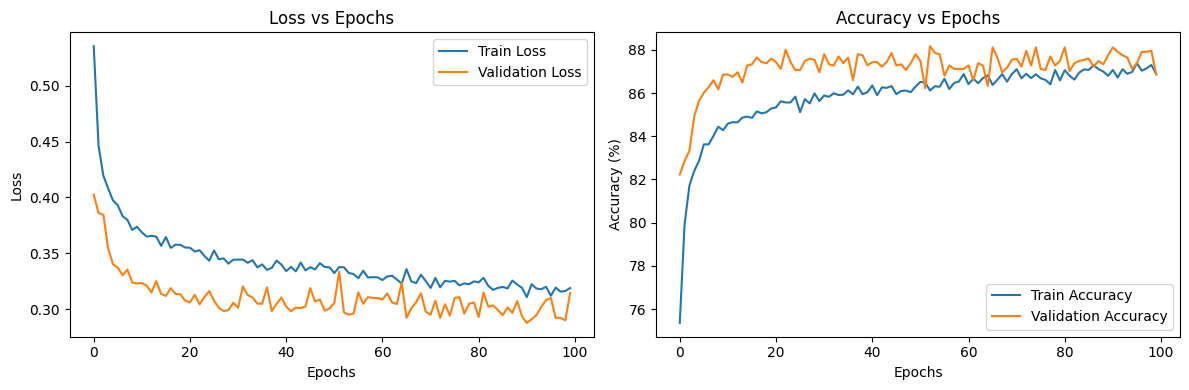


Test Accuracy: 88.07%


In [ ]:
batch_size = 32
train_loader = DataLoader(train_tensor, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_tensor, batch_size=batch_size)
test_loader = DataLoader(test_tensor, batch_size=batch_size)

model = MLP()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

test_accuracy = evaluate_model(model, test_loader)
print(f'\nTest Accuracy: {test_accuracy:.2f}%')

Training the Model with xavier initialization
Epoch [10/100], Train Loss: 1.0370, Val Loss: 0.8386
Train Accuracy: 49.89%, Val Accuracy: 45.43%
Epoch [20/100], Train Loss: 1.0549, Val Loss: 0.8326
Train Accuracy: 49.73%, Val Accuracy: 49.89%
Epoch [30/100], Train Loss: 1.0358, Val Loss: 0.8212
Train Accuracy: 50.53%, Val Accuracy: 49.32%
Epoch [40/100], Train Loss: 1.0381, Val Loss: 0.8108
Train Accuracy: 50.78%, Val Accuracy: 48.79%
Epoch [50/100], Train Loss: 1.0457, Val Loss: 0.8059
Train Accuracy: 49.89%, Val Accuracy: 51.84%
Epoch [60/100], Train Loss: 1.0238, Val Loss: 0.8072
Train Accuracy: 50.42%, Val Accuracy: 45.74%
Epoch [70/100], Train Loss: 1.0389, Val Loss: 0.8095
Train Accuracy: 50.34%, Val Accuracy: 51.52%
Epoch [80/100], Train Loss: 1.0377, Val Loss: 0.8519
Train Accuracy: 50.41%, Val Accuracy: 47.32%
Epoch [90/100], Train Loss: 1.0359, Val Loss: 0.8079
Train Accuracy: 49.95%, Val Accuracy: 51.05%
Epoch [100/100], Train Loss: 1.0520, Val Loss: 0.8488
Train Accuracy: 49

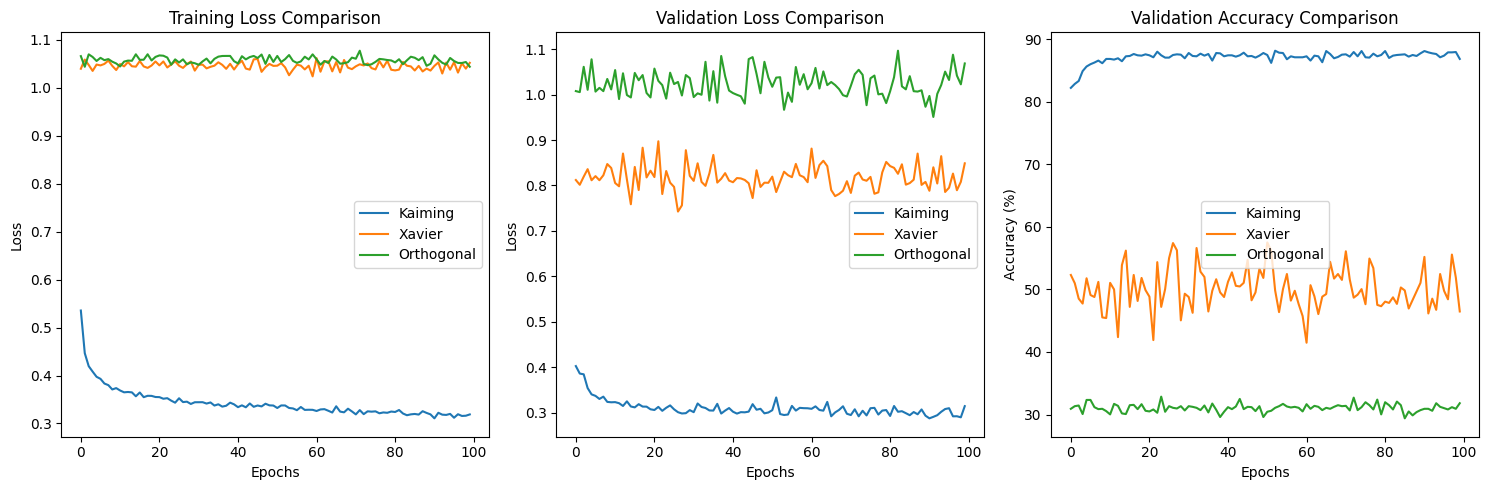

In [ ]:
batch_size = 32
train_loader = DataLoader(train_tensor, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_tensor, batch_size=batch_size)
test_loader = DataLoader(test_tensor, batch_size=batch_size)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

print('Training the Model with xavier initialization')
xavier_model = MLP(method='xavier')
xavier, xavier_train_losses, xavier_val_losses, xavier_train_accuracies, xavier_val_accuracies = train_model(
    xavier_model, train_loader, val_loader, criterion, optimizer, scheduler
)
xavier_acc = evaluate_model(xavier, test_loader)

print('\nTraining the Model with orthogonal initialization')
orthogonal_model = MLP(method='orthogonal')
orthogonal, orthogonal_train_losses, orthogonal_val_losses, orthogonal_train_accuracies, orthogonal_val_accuracies = train_model(
    orthogonal_model, train_loader, val_loader, criterion, optimizer, scheduler
)
orthogonal_acc = evaluate_model(orthogonal, test_loader)


# Print comparison results
print("\nFinal Test Accuracies:")
print(f"Kaiming Normal: {test_accuracy:.2f}%")
print(f"Xavier Uniform: {xavier_acc:.2f}%")
print(f"Orthogonal: {orthogonal_acc:.2f}%")

# Plot comparison of learning curves
plt.figure(figsize=(15, 5))

# Plot training losses
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Kaiming')
plt.plot(xavier_train_losses, label='Xavier')
plt.plot(orthogonal_train_losses, label='Orthogonal')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation losses
plt.subplot(1, 3, 2)
plt.plot(val_losses, label='Kaiming')
plt.plot(xavier_val_losses, label='Xavier')
plt.plot(orthogonal_val_losses, label='Orthogonal')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracies
plt.subplot(1, 3, 3)
plt.plot(val_accuracies, label='Kaiming')
plt.plot(xavier_val_accuracies, label='Xavier')
plt.plot(orthogonal_val_accuracies, label='Orthogonal')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

We chose to retrain our model with Xavier and Orthogonal initializations.
* Xaiver uniform initalization is designed to maintain variance across layers, how ever it does not works well with ReLU activation function (As we explained in assigment 1 section 6). We can also see it here, the test accuracy with xavier uniform initalization was significatly lower than the test accuracy of the model with kaiming normal initalization which is designed specifically for ReLU activation.
* Orthogonal initialization helps preserve gradient magnitudes during backpropagation. It creates weights that are orghogonal to each other, which can help with feature independence. It looks like that these properties don't necessarily translate well to networks with ReLU activations, the network is even worse than making a random choise. whit might be likely due to poor gradient flow from the initialization issues.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Design a CNN
---
In this task you are going to design a deep convolutional neural network to classify 10 classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute) - **The Imagenette Dataset**.

* 10 classes, 1 for each object.
* 9469 images for training and 3925 for testing (70/30 separation).
* We will use a downscaled version where the images are resized to $64\times 64$ resolution.

<center><img src="https://storage.googleapis.com/tfds-data/visualization/fig/imagenette-160px-v2-1.0.0.png" style="height:300px"></center>

1. Load the the Imagenette dataset with PyTorch using `torchvision.datasets.Imagenette(
    root='./datasets', split='train', size='160px', download=True, transform=transform_train)`, where `split` is either `'train'` or `'val'`, you can read more here: https://pytorch.org/vision/main/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette . Use the `transform` parameter to resize the images to $64 \times 64$ (for train, validation and test) and convert the data to tensors, e.g.,
   
   <code>transform_test=transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),])</code>
    
   Display 5 images from the train set.

   <a href="https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb">Train, Validation and Test Split for torchvision Datasets</a>

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),
    torchvision.transforms.ToTensor(), # uint8 values in [0, 255] -> float tensor with values [0, 1]
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # [mu, sigma] standartization, RGB values
])

trainset = torchvision.datasets.Imagenette(
    root='./datasets',
    split='train',
    size='160px',
    download=True,
    transform=transform
)

full_val_dataset = torchvision.datasets.Imagenette(
    root='./datasets',
    split='val',
    size='160px',
    download=False,
    transform=transform
)


100%|██████████| 99.0M/99.0M [00:02<00:00, 40.6MB/s]


Extracting ./datasets/imagenette2-160.tgz to ./datasets


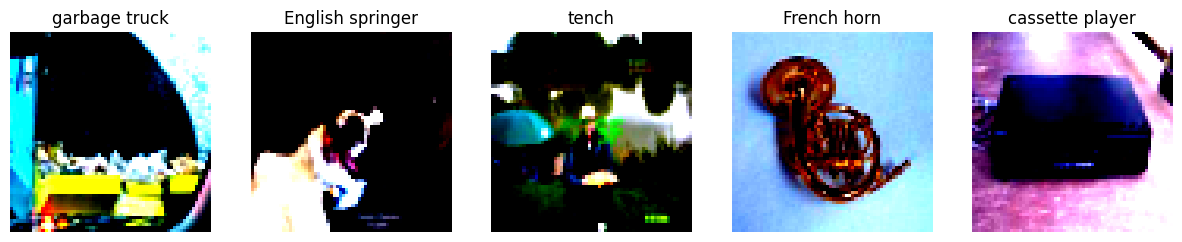

In [ ]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=5,
    shuffle=True
)

images, labels = next(iter(trainloader))

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].clamp(0,1).numpy()
    img = img.transpose(1, 2, 0)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'{trainset.classes[labels[i]][0]}')
plt.show()

---
2. Design a Convolutional Neural Network (CNN) to classify classes from the images.
    * You are **not allowed** to use `BatchNorm` in your architecture, but can use any other normalization (`GroupNorm`, `LayerNorm`, and etc..).
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network. What is the model size in MegaBytes (MB)? (see the convolution tutorial). **Print** these numbers.

In [6]:
import torch.nn as nn

class ImagenetteCNN(nn.Module):
    """CNN for the Imagenette Dataset"""
    def __init__(self):
        """CNN Builder."""
        super(ImagenetteCNN, self).__init__()

        self.conv_layer = nn.Sequential(
            # First block
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.GroupNorm(8, 32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 64->32

            # Second block
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.GroupNorm(8, 64),
            nn.ReLU(inplace=True),

            # Third block
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.GroupNorm(8, 128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32->16
            nn.Dropout2d(p=0.05),

            # Fourth block
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.GroupNorm(16, 128),
            nn.ReLU(inplace=True),

            # Fifth block
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 16->8
            nn.Dropout2d(p=0.05),

            # Sixth block
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.GroupNorm(16, 256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 8->4
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)

        # fc layer
        x = self.fc_layer(x)
        return x

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

dummy_model = ImagenetteCNN()
num_params = count_parameters(dummy_model)
param_size = 0
for param in dummy_model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in dummy_model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()
model_size_mb = (param_size + buffer_size) / 1024 ** 2

print(f"Number of trainable parameters: {num_params:,}")
print(f"Model size in MB: {model_size_mb:.2f}")

Number of trainable parameters: 6,012,938
Model size in MB: 22.94


In [16]:
class ImagenetteCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(ImagenetteCNN, self).__init__()

        self.conv_layers = nn.Sequential(
            # Conv 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.GroupNorm(8, 64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 32x32

            # Conv 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.GroupNorm(16, 128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 16x16

            # Conv 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.GroupNorm(32, 256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.GroupNorm(32, 256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 8x8

            # Conv 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.GroupNorm(32, 512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.GroupNorm(32, 512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)  # 4x4
        )

        self.global_pool = nn.AdaptiveAvgPool2d(1)

        self.dropout = nn.Dropout(0.5)

        self.fc = nn.Linear(512, num_classes)

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.conv_layers(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)

        return x

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

dummy_model = ImagenetteCNN()
num_params = count_parameters(dummy_model)
param_size = 0
for param in dummy_model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in dummy_model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()
model_size_mb = (param_size + buffer_size) / 1024 ** 2

print(f"Number of trainable parameters: {num_params:,}")
print(f"Model size in MB: {model_size_mb:.2f}")

Number of trainable parameters: 4,509,450
Model size in MB: 17.20


### CNN Architecture

**Conv Block 1:** \
input: $3\times 64\times 64 →$ Conv: $64$ channels $→$ Max Pooling: $64\times 32\times 32$

**Conv Block 2:** \
input: $64\times 32\times 32 →$ Conv: $128$ channels $→$ Max Pooling: $128\times 16\times 16$

**Conv Block 3:** \
input: $128\times 16\times 16 →$ Conv: $256$ channels $→$ Max Pooling: $256\times 8\times 8$

**Conv Block 4:** \
input: $256\times 8\times 8 →$ Conv: $512$ channels $→$ Max Pooling: $512\times 4\times 4$

**Key Features in each Conv Block:**
* $3\times 3$ filters with padding = $1$ to preserve spatial dimensions.
* GroupNorm for normalization (better for small batches).
* ReLU activations for non-linearity.
* MaxPooling ($2\times 2$) for downsampling by a factor of $2$.

This design progressively increases channels ($64 → 512$) and reduces spatial size ($64 → 4$).

**Global Pooling:** \
$AdaptiveAvgPool2d(1)$ reduces each feature map to a $1x1$ spatial size, resulting in $512 × 1 × 1 →$ effectively reduces it to a $512$-dimensional vector.

**Dropout (p=$0.5$):** \
Prevents overfitting by randomly deactivating 50% of neurons during training.

**Fully Connected Layer:** \
Linear($512$, num_classes) maps the $512$ features to $10$ output classes.
Output = $10$ values, which can be passed through softmax during training.


#### Input Dimension: $(3\times 64\times 64)$
$3$ channels for color (RGB), height=$64$, width=$64$

#### Output Dimension:
$10$ values, each corresponding to the probability for one of the 10 classes in the dataset.

The network progressively increases channels (64 → 512) while reducing spatial size (64 → 4) using MaxPooling.

The global average pooling reduces reliance on fully connected layers, improving generalization.

ReLU activation function was used after convolutional layer to introduce non-linearity.

The $conv2d$ layers were initialized using the *Kaiming Normal Initialization*, while the $FC$ layer was initialized with small random values (mean=0, std=0.01) and biases set to 0.

All Convolution filters are $3\times 3$

Dropout prevents overfitting, and Kaiming Initialization ensures proper weight scaling for ReLU.




---
3. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
    * **DO NOT USE ANY IMAGE AUGMENTATIONS IN THIS PART** (You can still use `Normalize` if you wish, but no cropping, flipping and etc...).
    * You are not allowed to use pre-trained models (i.e., no transfer learning, only learning from scratch).
    * Describe the hyper-parameters of the model (batch size, epochs, optimizer, learning rate, scheduler....). How did you tune your model? Did you use a validation set to tune the model?
    * What is the final accuracy on the test set? **Print** it.
        * You need to reach at least 73% accuracy in this section, and 78% for maximum points in section 5.
    * **Plot** the loss curves (and any other statistic you calculate) as a function of epochs/iterations.


In [17]:
# time to train our model - from tutorial
# hyper-parameters
batch_size = 128
learning_rate = 3e-4
epochs = 40

# Split the validation dataset into validation and test datasets (10% val, 20% test)
val_size = len(full_val_dataset) // 3
test_size = len(full_val_dataset) - val_size
valset, testset = torch.utils.data.random_split(full_val_dataset, [val_size, test_size])

# dataloaders - creating batches and shuffling the data
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(
    valset, batch_size=batch_size, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2)

# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterion
criterion = nn.CrossEntropyLoss()  # accepts 'logits' - unnormalized scores (no need to apply `softmax` manually)

# build our model and send it to the device
model = ImagenetteCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Optimizer - Adam
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=40, eta_min=1e-6)

#### Hyper-Parameters
* batch-size = $128$
* learning-rate = $3\cdot 10^{-4}$
* epochs = $30$
* optimizer = $Adam$
* scheduler = $CosineAnnelingLR$

We tuned these hyper parameters using a validation set we used in batches after each epoch.

In [18]:
# function to calcualte accuracy of the model
def calculate_accuracy(model, dataloader, device):
    model.eval()
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10, 10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1

    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix

In [19]:
train_accuracies = []
val_accuracies = []
losses = []
best_model = model
best_val_accuracy = 0.0
best_epoch = 0

# training loop
for epoch in range(1, epochs + 1):
    model.train()  # put in training mode, turn on Dropout, BatchNorm uses batch's statistics
    running_loss = 0.0
    epoch_time = time.time()

    # Use tqdm for batch progress within an epoch
    with tqdm(total=len(trainloader), desc=f"Epoch {epoch}/{epochs}") as pbar:
        for i, data in enumerate(trainloader):
            inputs, labels = data
            # send them to device
            inputs = inputs.to(device)
            labels = labels.to(device)

            # forward + backward + optimize
            outputs = model(inputs)  # forward pass
            loss = criterion(outputs, labels)  # calculate the loss
            # always the same 3 steps
            optimizer.zero_grad()  # zero the parameter gradients
            loss.backward()  # backpropagation
            optimizer.step()  # update parameters

            # Update statistics
            running_loss += loss.data.item()

            # Update tqdm progress bar
            pbar.set_postfix(loss=loss.item())
            pbar.update(1)

    scheduler.step()
    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader)
    losses.append(running_loss)

    # Calculate training/val set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    train_accuracies.append(train_accuracy)
    val_accuracy, _ = calculate_accuracy(model, validationloader, device)
    val_accuracies.append(val_accuracy)

    if (val_accuracy > best_val_accuracy):
        best_val_accuracy = val_accuracy
        best_model = copy.deepcopy(model.state_dict())
        best_epoch = epoch

    # Log epoch results with tqdm
    epoch_time = time.time() - epoch_time
    tqdm.write(f"Epoch {epoch}/{epochs} | Loss: {running_loss:.4f} | "
               f"Train Acc: {train_accuracy:.3f}% | Val Acc: {val_accuracy:.3f}% | "
               f"Time: {epoch_time:.2f}s")

model.load_state_dict(best_model)
tqdm.write(f'==> Saving model, best one was from epoch {best_epoch}, val_acc = {best_val_accuracy:.3f}%')
state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
if not os.path.isdir('checkpoints'):
    os.mkdir('checkpoints')
torch.save(state, './checkpoints/imagenette_cnn_ckpt.pth')
tqdm.write('==> Finished Training ...')

Epoch 1/40: 100%|██████████| 74/74 [00:12<00:00,  6.12it/s, loss=1.93]


Epoch 1/40 | Loss: 2.1423 | Train Acc: 31.376% | Val Acc: 31.957% | Time: 23.91s


Epoch 2/40: 100%|██████████| 74/74 [00:11<00:00,  6.33it/s, loss=1.65]


Epoch 2/40 | Loss: 1.7937 | Train Acc: 47.270% | Val Acc: 44.801% | Time: 23.15s


Epoch 3/40: 100%|██████████| 74/74 [00:11<00:00,  6.51it/s, loss=1.42]


Epoch 3/40 | Loss: 1.5453 | Train Acc: 49.910% | Val Acc: 47.477% | Time: 24.09s


Epoch 4/40: 100%|██████████| 74/74 [00:12<00:00,  6.08it/s, loss=1.4]


Epoch 4/40 | Loss: 1.3881 | Train Acc: 55.476% | Val Acc: 53.135% | Time: 24.53s


Epoch 5/40: 100%|██████████| 74/74 [00:11<00:00,  6.33it/s, loss=1.24]


Epoch 5/40 | Loss: 1.2405 | Train Acc: 61.897% | Val Acc: 59.327% | Time: 23.83s


Epoch 6/40: 100%|██████████| 74/74 [00:12<00:00,  6.04it/s, loss=1.21]


Epoch 6/40 | Loss: 1.1291 | Train Acc: 66.850% | Val Acc: 65.061% | Time: 24.79s


Epoch 7/40: 100%|██████████| 74/74 [00:12<00:00,  6.15it/s, loss=0.974]


Epoch 7/40 | Loss: 1.0698 | Train Acc: 67.716% | Val Acc: 66.437% | Time: 23.25s


Epoch 8/40: 100%|██████████| 74/74 [00:11<00:00,  6.21it/s, loss=0.922]


Epoch 8/40 | Loss: 0.9776 | Train Acc: 71.222% | Val Acc: 69.801% | Time: 24.68s


Epoch 9/40: 100%|██████████| 74/74 [00:11<00:00,  6.24it/s, loss=0.814]


Epoch 9/40 | Loss: 0.8967 | Train Acc: 73.683% | Val Acc: 69.954% | Time: 23.73s


Epoch 10/40: 100%|██████████| 74/74 [00:10<00:00,  7.20it/s, loss=0.963]


Epoch 10/40 | Loss: 0.8485 | Train Acc: 75.636% | Val Acc: 71.713% | Time: 22.92s


Epoch 11/40: 100%|██████████| 74/74 [00:12<00:00,  6.08it/s, loss=0.822]


Epoch 11/40 | Loss: 0.8328 | Train Acc: 75.351% | Val Acc: 72.018% | Time: 24.89s


Epoch 12/40: 100%|██████████| 74/74 [00:10<00:00,  6.76it/s, loss=0.834]


Epoch 12/40 | Loss: 0.7753 | Train Acc: 76.196% | Val Acc: 71.101% | Time: 21.64s


Epoch 13/40: 100%|██████████| 74/74 [00:11<00:00,  6.23it/s, loss=0.677]


Epoch 13/40 | Loss: 0.7255 | Train Acc: 79.058% | Val Acc: 73.394% | Time: 24.52s


Epoch 14/40: 100%|██████████| 74/74 [00:12<00:00,  6.07it/s, loss=0.617]


Epoch 14/40 | Loss: 0.7262 | Train Acc: 77.484% | Val Acc: 73.242% | Time: 23.25s


Epoch 15/40: 100%|██████████| 74/74 [00:10<00:00,  6.87it/s, loss=0.793]


Epoch 15/40 | Loss: 0.7088 | Train Acc: 79.216% | Val Acc: 73.394% | Time: 23.45s


Epoch 16/40: 100%|██████████| 74/74 [00:12<00:00,  5.96it/s, loss=0.7]


Epoch 16/40 | Loss: 0.6358 | Train Acc: 82.701% | Val Acc: 76.147% | Time: 24.64s


Epoch 17/40: 100%|██████████| 74/74 [00:11<00:00,  6.64it/s, loss=0.607]


Epoch 17/40 | Loss: 0.6217 | Train Acc: 78.498% | Val Acc: 72.018% | Time: 21.92s


Epoch 18/40: 100%|██████████| 74/74 [00:11<00:00,  6.24it/s, loss=0.467]


Epoch 18/40 | Loss: 0.5940 | Train Acc: 84.264% | Val Acc: 76.835% | Time: 23.98s


Epoch 19/40: 100%|██████████| 74/74 [00:12<00:00,  6.06it/s, loss=0.682]


Epoch 19/40 | Loss: 0.5340 | Train Acc: 83.684% | Val Acc: 76.070% | Time: 23.85s


Epoch 20/40: 100%|██████████| 74/74 [00:10<00:00,  7.24it/s, loss=0.531]


Epoch 20/40 | Loss: 0.5352 | Train Acc: 85.321% | Val Acc: 77.064% | Time: 22.83s


Epoch 21/40: 100%|██████████| 74/74 [00:11<00:00,  6.18it/s, loss=0.582]


Epoch 21/40 | Loss: 0.4971 | Train Acc: 86.799% | Val Acc: 77.676% | Time: 24.62s


Epoch 22/40: 100%|██████████| 74/74 [00:11<00:00,  6.57it/s, loss=0.476]


Epoch 22/40 | Loss: 0.4554 | Train Acc: 86.841% | Val Acc: 76.453% | Time: 21.86s


Epoch 23/40: 100%|██████████| 74/74 [00:12<00:00,  5.88it/s, loss=0.591]


Epoch 23/40 | Loss: 0.4212 | Train Acc: 87.074% | Val Acc: 76.529% | Time: 25.20s


Epoch 24/40: 100%|██████████| 74/74 [00:12<00:00,  5.90it/s, loss=0.547]


Epoch 24/40 | Loss: 0.4121 | Train Acc: 88.584% | Val Acc: 76.606% | Time: 23.32s


Epoch 25/40: 100%|██████████| 74/74 [00:11<00:00,  6.29it/s, loss=0.417]


Epoch 25/40 | Loss: 0.3916 | Train Acc: 90.759% | Val Acc: 79.358% | Time: 24.09s


Epoch 26/40: 100%|██████████| 74/74 [00:12<00:00,  6.13it/s, loss=0.519]


Epoch 26/40 | Loss: 0.3462 | Train Acc: 90.516% | Val Acc: 79.052% | Time: 24.33s


Epoch 27/40: 100%|██████████| 74/74 [00:10<00:00,  7.33it/s, loss=0.389]


Epoch 27/40 | Loss: 0.3129 | Train Acc: 91.974% | Val Acc: 78.287% | Time: 22.46s


Epoch 28/40: 100%|██████████| 74/74 [00:11<00:00,  6.20it/s, loss=0.355]


Epoch 28/40 | Loss: 0.2907 | Train Acc: 93.273% | Val Acc: 78.746% | Time: 24.05s


Epoch 29/40: 100%|██████████| 74/74 [00:10<00:00,  6.94it/s, loss=0.317]


Epoch 29/40 | Loss: 0.2763 | Train Acc: 93.030% | Val Acc: 78.976% | Time: 22.51s


Epoch 30/40: 100%|██████████| 74/74 [00:11<00:00,  6.31it/s, loss=0.231]


Epoch 30/40 | Loss: 0.2567 | Train Acc: 92.502% | Val Acc: 78.517% | Time: 24.15s


Epoch 31/40: 100%|██████████| 74/74 [00:11<00:00,  6.42it/s, loss=0.196]


Epoch 31/40 | Loss: 0.2310 | Train Acc: 95.216% | Val Acc: 79.817% | Time: 21.90s


Epoch 32/40: 100%|██████████| 74/74 [00:12<00:00,  6.13it/s, loss=0.214]


Epoch 32/40 | Loss: 0.2173 | Train Acc: 95.121% | Val Acc: 80.887% | Time: 24.14s


Epoch 33/40: 100%|██████████| 74/74 [00:11<00:00,  6.20it/s, loss=0.217]


Epoch 33/40 | Loss: 0.2017 | Train Acc: 96.230% | Val Acc: 80.275% | Time: 22.24s


Epoch 34/40: 100%|██████████| 74/74 [00:11<00:00,  6.24it/s, loss=0.184]


Epoch 34/40 | Loss: 0.1902 | Train Acc: 96.483% | Val Acc: 81.040% | Time: 24.27s


Epoch 35/40: 100%|██████████| 74/74 [00:12<00:00,  6.16it/s, loss=0.125]


Epoch 35/40 | Loss: 0.1856 | Train Acc: 96.663% | Val Acc: 80.352% | Time: 23.15s


Epoch 36/40: 100%|██████████| 74/74 [00:11<00:00,  6.36it/s, loss=0.242]


Epoch 36/40 | Loss: 0.1721 | Train Acc: 96.716% | Val Acc: 80.505% | Time: 24.24s


Epoch 37/40: 100%|██████████| 74/74 [00:12<00:00,  5.93it/s, loss=0.189]


Epoch 37/40 | Loss: 0.1648 | Train Acc: 96.737% | Val Acc: 80.581% | Time: 24.26s


Epoch 38/40: 100%|██████████| 74/74 [00:10<00:00,  7.16it/s, loss=0.125]


Epoch 38/40 | Loss: 0.1628 | Train Acc: 97.032% | Val Acc: 80.275% | Time: 22.78s


Epoch 39/40: 100%|██████████| 74/74 [00:12<00:00,  6.03it/s, loss=0.178]


Epoch 39/40 | Loss: 0.1616 | Train Acc: 97.011% | Val Acc: 80.581% | Time: 24.80s


Epoch 40/40: 100%|██████████| 74/74 [00:10<00:00,  6.95it/s, loss=0.128]


Epoch 40/40 | Loss: 0.1594 | Train Acc: 97.117% | Val Acc: 80.657% | Time: 22.36s
==> Saving model, best one was from epoch 34, val_acc = 81.040%
==> Finished Training ...


Test Accuracy: 79.710%


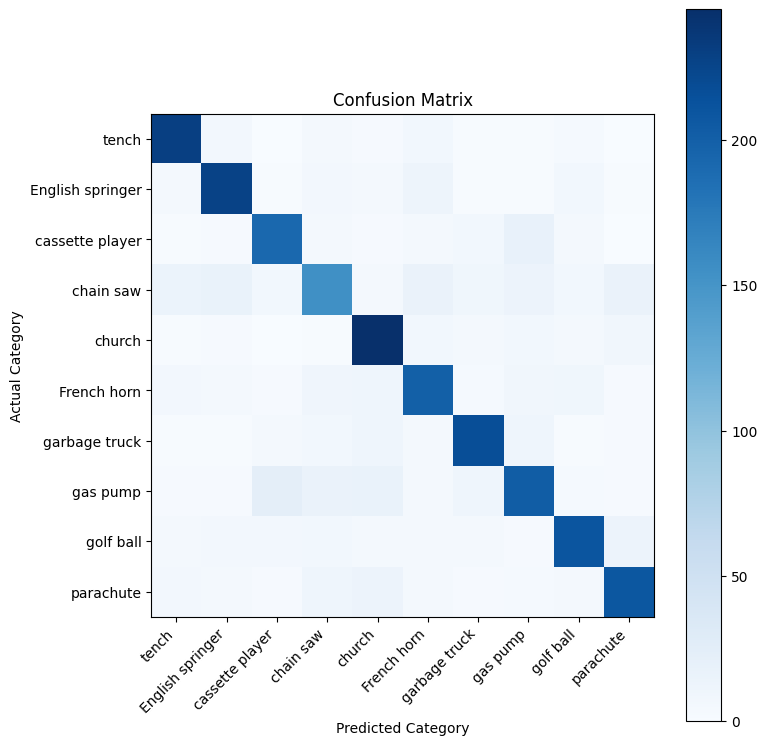

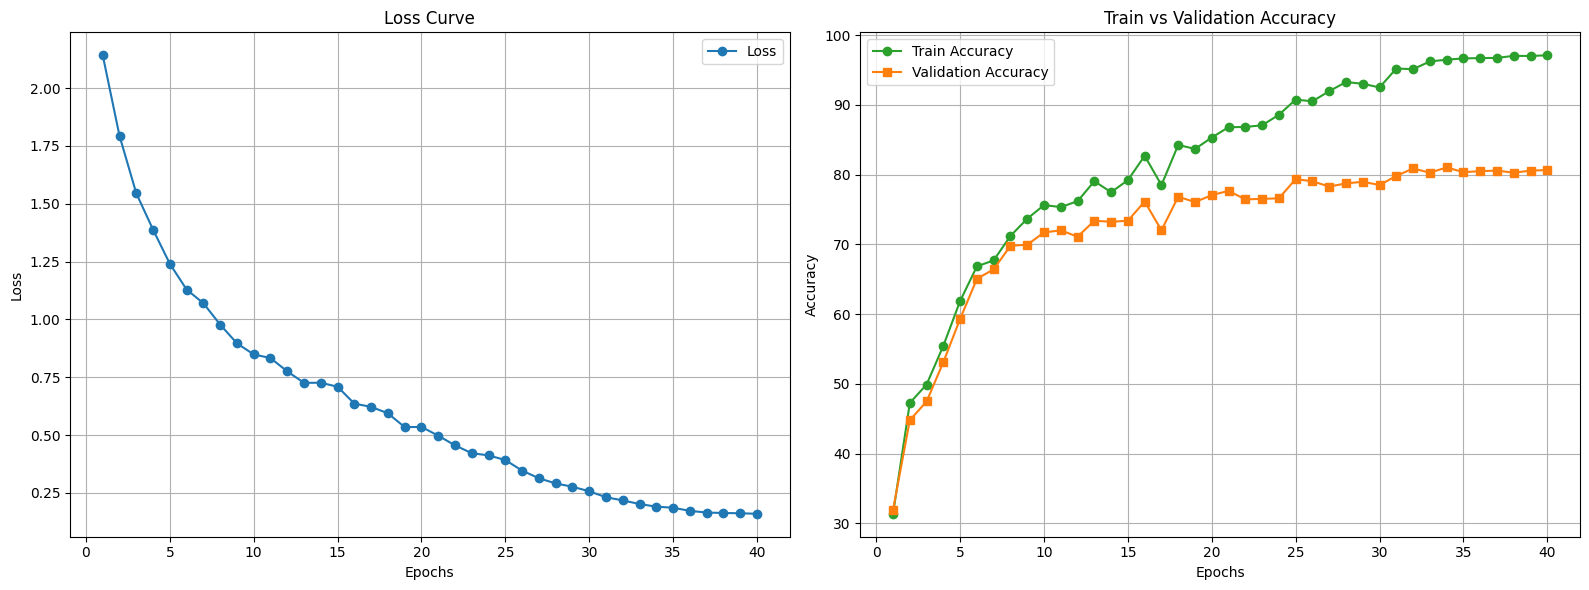

In [20]:
model = ImagenetteCNN().to(device)
state = torch.load('./checkpoints/imagenette_cnn_ckpt.pth', map_location=device,weights_only=True)
model.load_state_dict(state['net'])

test_accuracy, confusion_matrix = calculate_accuracy(model, testloader, device)
print("Test Accuracy: {:.3f}%".format(test_accuracy))

# --- Confusion Matrix Plot ---
classes = ('tench', 'English springer', 'cassette player', 'chain saw',
           'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute')

plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes, rotation=45, ha='right')
plt.yticks(range(10), classes)
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# --- Loss and Accuracy Curves ---
epoch_range = list(range(1, epochs+1))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Loss Curve
axes[0].plot(epoch_range, losses, marker='o', label='Loss', color='tab:blue')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curve')
axes[0].grid(True)
axes[0].legend()

# Subplot 2: Train vs Validation Accuracy
axes[1].plot(epoch_range, train_accuracies, marker='o', label='Train Accuracy', color='tab:green')
axes[1].plot(epoch_range, val_accuracies, marker='s', label='Validation Accuracy', color='tab:orange')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Train vs Validation Accuracy')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.savefig('loss_accuracy_curves.png')
plt.show()

---
4. For the trained classifier, what is the accuracy on the test set when each test image is added a small noise $a=(0.05, 0.01, 0.005)$: $$ \text{image} + a \times \mathcal{N}(0, 1).$$ **Print** the result for each value of $a$.

In [21]:
def calculate_accuracy_with_noise(model, dataloader, device, noise_std=0):
    model.eval()
    total_correct = 0
    total_images = 0

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            if noise_std > 0:
                noise = torch.randn_like(images) * noise_std
                images = images + noise

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()

    return (total_correct / total_images) * 100

In [22]:
a = [0.05, 0.01, 0.005]
test_accuracies = np.zeros_like(a)

for i, noise_level in enumerate(a):
    noisy_images = []
    noisy_labels = []
    test_accuracies[i] = calculate_accuracy_with_noise(model, testloader, device, noise_level)

print('Test accuracies with noise:')
for noise_level, accuracy in zip(a, test_accuracies):
    print(f'a={noise_level}: {accuracy:.3f}%')

Test accuracies with noise:
a=0.05: 78.449%
a=0.01: 79.671%
a=0.005: 79.748%


---
5. Retrain the classifier, but this time use data augementations of your choosing. Briefly explain what augmentation you chose and how it works. Did the test accuracy improve? **Print** the result.
    * You can use transformations available in `torchvision.transforms` as shown in the tutorial.
    * You are welcome to use <a href="https://kornia.github.io/">`kornia`</a> for the augmentations (**2 points bonus**, maximal grade is still 100).
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.


In [25]:
!pip install kornia
from kornia import augmentation as K
from kornia.augmentation import AugmentationSequential

def train_noise_robust_model(model, trainloader, validationloader, device, epochs=40):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=40, eta_min=1e-6)

    # Augmentations
    aug_list = nn.ModuleList([
        K.ColorJitter(0.025, 0.025, 0.025, 0.025, p=0.3),
        K.RandomGaussianBlur(kernel_size=(3, 3), sigma=(0.1, 0.5), p=0.2),
        K.RandomHorizontalFlip(p=0.5),
        K.RandomAffine(degrees=5, translate=(0.05, 0.05), p=0.25)
    ]).to(device)


    best_model_state = copy.deepcopy(model.state_dict())
    best_val_accuracy = 0.0
    val_accuracies_clean = []
    val_accuracies_noisy = []
    losses = []

    for epoch in range(1, epochs + 1):
        model.train()
        running_loss = 0.0
        epoch_time = time.time()

        with tqdm(total=len(trainloader), desc=f"Epoch {epoch}/{epochs}") as pbar:
            for i, data in enumerate(trainloader):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                # Apply augmentations
                for aug in aug_list:
                    inputs = aug(inputs)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                pbar.set_postfix(loss=loss.item())
                pbar.update(1)

        scheduler.step()
        running_loss /= len(trainloader)
        losses.append(running_loss)

        clean_accuracy = calculate_accuracy_with_noise(model, validationloader, device)
        noisy_accuracy = calculate_accuracy_with_noise(model, validationloader, device, noise_std=0.1)

        avg_accuracy = (clean_accuracy + noisy_accuracy)/2

        if avg_accuracy > best_val_accuracy:
          best_val_accuracy = avg_accuracy
          best_model_state = copy.deepcopy(model.state_dict())

        val_accuracies_clean.append(clean_accuracy)
        val_accuracies_noisy.append(noisy_accuracy)

        epoch_time = time.time() - epoch_time
        tqdm.write(f"Epoch {epoch}/{epochs} | Loss: {running_loss:.4f} | "
                  f"Clean Val Acc: {clean_accuracy:.3f}% | "
                  f"Noisy Val Acc: {noisy_accuracy:.3f}%")

    model.load_state_dict(best_model_state)

    training_stats = {
        'model': model,
        'losses': losses,
        'clean_accuracies': val_accuracies_clean,
        'noisy_accuracies': val_accuracies_noisy
    }

    return training_stats

In [26]:
# Setup for training
mode_robust = ImagenetteCNN().to(device)
training_stats = train_noise_robust_model(mode_robust, trainloader, validationloader, device, epochs=40)
model_robust = training_stats['model']

# Save the model
if not os.path.isdir('checkpoints'):
    os.mkdir('checkpoints')
torch.save({
    'net': model_robust.state_dict()
}, './checkpoints/imagenette_cnn_robust.pth')

Epoch 1/40: 100%|██████████| 74/74 [00:22<00:00,  3.32it/s, loss=1.9]


Epoch 1/40 | Loss: 2.1662 | Clean Val Acc: 30.963% | Noisy Val Acc: 29.893%


Epoch 2/40: 100%|██████████| 74/74 [00:13<00:00,  5.52it/s, loss=1.95]


Epoch 2/40 | Loss: 1.8941 | Clean Val Acc: 40.443% | Noisy Val Acc: 40.214%


Epoch 3/40: 100%|██████████| 74/74 [00:13<00:00,  5.61it/s, loss=1.6]


Epoch 3/40 | Loss: 1.6854 | Clean Val Acc: 45.872% | Noisy Val Acc: 43.119%


Epoch 4/40: 100%|██████████| 74/74 [00:13<00:00,  5.66it/s, loss=1.56]


Epoch 4/40 | Loss: 1.5366 | Clean Val Acc: 49.388% | Noisy Val Acc: 48.471%


Epoch 5/40: 100%|██████████| 74/74 [00:12<00:00,  5.74it/s, loss=1.2]


Epoch 5/40 | Loss: 1.4092 | Clean Val Acc: 55.199% | Noisy Val Acc: 53.135%


Epoch 6/40: 100%|██████████| 74/74 [00:14<00:00,  5.14it/s, loss=1.17]


Epoch 6/40 | Loss: 1.2798 | Clean Val Acc: 60.856% | Noisy Val Acc: 59.480%


Epoch 7/40: 100%|██████████| 74/74 [00:13<00:00,  5.53it/s, loss=1.09]


Epoch 7/40 | Loss: 1.2232 | Clean Val Acc: 63.379% | Noisy Val Acc: 62.156%


Epoch 8/40: 100%|██████████| 74/74 [00:12<00:00,  5.75it/s, loss=1.29]


Epoch 8/40 | Loss: 1.1544 | Clean Val Acc: 65.596% | Noisy Val Acc: 64.908%


Epoch 9/40: 100%|██████████| 74/74 [00:13<00:00,  5.59it/s, loss=1.23]


Epoch 9/40 | Loss: 1.1044 | Clean Val Acc: 67.966% | Noisy Val Acc: 66.131%


Epoch 10/40: 100%|██████████| 74/74 [00:13<00:00,  5.45it/s, loss=1.13]


Epoch 10/40 | Loss: 1.0543 | Clean Val Acc: 68.349% | Noisy Val Acc: 66.743%


Epoch 11/40: 100%|██████████| 74/74 [00:13<00:00,  5.49it/s, loss=0.966]


Epoch 11/40 | Loss: 1.0156 | Clean Val Acc: 70.260% | Noisy Val Acc: 69.495%


Epoch 12/40: 100%|██████████| 74/74 [00:13<00:00,  5.47it/s, loss=0.744]


Epoch 12/40 | Loss: 0.9956 | Clean Val Acc: 70.336% | Noisy Val Acc: 70.336%


Epoch 13/40: 100%|██████████| 74/74 [00:13<00:00,  5.47it/s, loss=0.911]


Epoch 13/40 | Loss: 0.9347 | Clean Val Acc: 69.419% | Noisy Val Acc: 68.654%


Epoch 14/40: 100%|██████████| 74/74 [00:13<00:00,  5.58it/s, loss=0.974]


Epoch 14/40 | Loss: 0.9107 | Clean Val Acc: 73.165% | Noisy Val Acc: 71.177%


Epoch 15/40: 100%|██████████| 74/74 [00:13<00:00,  5.50it/s, loss=1.01]


Epoch 15/40 | Loss: 0.9069 | Clean Val Acc: 72.095% | Noisy Val Acc: 69.878%


Epoch 16/40: 100%|██████████| 74/74 [00:13<00:00,  5.57it/s, loss=0.747]


Epoch 16/40 | Loss: 0.8662 | Clean Val Acc: 71.865% | Noisy Val Acc: 68.272%


Epoch 17/40: 100%|██████████| 74/74 [00:13<00:00,  5.42it/s, loss=0.843]


Epoch 17/40 | Loss: 0.8523 | Clean Val Acc: 75.076% | Noisy Val Acc: 73.930%


Epoch 18/40: 100%|██████████| 74/74 [00:13<00:00,  5.46it/s, loss=0.951]


Epoch 18/40 | Loss: 0.8145 | Clean Val Acc: 75.306% | Noisy Val Acc: 73.700%


Epoch 19/40: 100%|██████████| 74/74 [00:13<00:00,  5.67it/s, loss=0.865]


Epoch 19/40 | Loss: 0.8004 | Clean Val Acc: 75.535% | Noisy Val Acc: 75.153%


Epoch 20/40: 100%|██████████| 74/74 [00:12<00:00,  5.89it/s, loss=0.882]


Epoch 20/40 | Loss: 0.7817 | Clean Val Acc: 75.306% | Noisy Val Acc: 73.777%


Epoch 21/40: 100%|██████████| 74/74 [00:12<00:00,  6.16it/s, loss=0.847]


Epoch 21/40 | Loss: 0.7495 | Clean Val Acc: 76.606% | Noisy Val Acc: 74.771%


Epoch 22/40: 100%|██████████| 74/74 [00:12<00:00,  5.92it/s, loss=0.747]


Epoch 22/40 | Loss: 0.7129 | Clean Val Acc: 75.153% | Noisy Val Acc: 72.783%


Epoch 23/40: 100%|██████████| 74/74 [00:13<00:00,  5.58it/s, loss=0.801]


Epoch 23/40 | Loss: 0.7130 | Clean Val Acc: 76.988% | Noisy Val Acc: 74.847%


Epoch 24/40: 100%|██████████| 74/74 [00:13<00:00,  5.68it/s, loss=0.608]


Epoch 24/40 | Loss: 0.7036 | Clean Val Acc: 77.446% | Noisy Val Acc: 75.917%


Epoch 25/40: 100%|██████████| 74/74 [00:13<00:00,  5.60it/s, loss=0.679]


Epoch 25/40 | Loss: 0.6923 | Clean Val Acc: 76.988% | Noisy Val Acc: 75.229%


Epoch 26/40: 100%|██████████| 74/74 [00:13<00:00,  5.61it/s, loss=0.475]


Epoch 26/40 | Loss: 0.6739 | Clean Val Acc: 76.223% | Noisy Val Acc: 75.229%


Epoch 27/40: 100%|██████████| 74/74 [00:12<00:00,  5.73it/s, loss=0.829]


Epoch 27/40 | Loss: 0.6578 | Clean Val Acc: 77.752% | Noisy Val Acc: 76.300%


Epoch 28/40: 100%|██████████| 74/74 [00:13<00:00,  5.47it/s, loss=0.729]


Epoch 28/40 | Loss: 0.6240 | Clean Val Acc: 77.676% | Noisy Val Acc: 75.994%


Epoch 29/40: 100%|██████████| 74/74 [00:13<00:00,  5.59it/s, loss=0.559]


Epoch 29/40 | Loss: 0.6056 | Clean Val Acc: 77.523% | Noisy Val Acc: 75.076%


Epoch 30/40: 100%|██████████| 74/74 [00:13<00:00,  5.46it/s, loss=0.599]


Epoch 30/40 | Loss: 0.5939 | Clean Val Acc: 78.211% | Noisy Val Acc: 76.911%


Epoch 31/40: 100%|██████████| 74/74 [00:13<00:00,  5.58it/s, loss=0.522]


Epoch 31/40 | Loss: 0.5660 | Clean Val Acc: 78.517% | Noisy Val Acc: 75.459%


Epoch 32/40: 100%|██████████| 74/74 [00:13<00:00,  5.53it/s, loss=0.377]


Epoch 32/40 | Loss: 0.5634 | Clean Val Acc: 78.517% | Noisy Val Acc: 76.911%


Epoch 33/40: 100%|██████████| 74/74 [00:13<00:00,  5.53it/s, loss=0.548]


Epoch 33/40 | Loss: 0.5572 | Clean Val Acc: 78.899% | Noisy Val Acc: 77.370%


Epoch 34/40: 100%|██████████| 74/74 [00:13<00:00,  5.51it/s, loss=0.475]


Epoch 34/40 | Loss: 0.5416 | Clean Val Acc: 79.434% | Noisy Val Acc: 77.829%


Epoch 35/40: 100%|██████████| 74/74 [00:13<00:00,  5.51it/s, loss=0.514]


Epoch 35/40 | Loss: 0.5335 | Clean Val Acc: 78.517% | Noisy Val Acc: 77.829%


Epoch 36/40: 100%|██████████| 74/74 [00:13<00:00,  5.51it/s, loss=0.768]


Epoch 36/40 | Loss: 0.5229 | Clean Val Acc: 79.128% | Noisy Val Acc: 77.982%


Epoch 37/40: 100%|██████████| 74/74 [00:13<00:00,  5.53it/s, loss=0.509]


Epoch 37/40 | Loss: 0.5167 | Clean Val Acc: 79.205% | Noisy Val Acc: 77.370%


Epoch 38/40: 100%|██████████| 74/74 [00:12<00:00,  5.90it/s, loss=0.352]


Epoch 38/40 | Loss: 0.5142 | Clean Val Acc: 79.052% | Noisy Val Acc: 77.599%


Epoch 39/40: 100%|██████████| 74/74 [00:12<00:00,  6.11it/s, loss=0.633]


Epoch 39/40 | Loss: 0.5021 | Clean Val Acc: 78.746% | Noisy Val Acc: 77.676%


Epoch 40/40: 100%|██████████| 74/74 [00:12<00:00,  5.74it/s, loss=0.362]


Epoch 40/40 | Loss: 0.5065 | Clean Val Acc: 79.434% | Noisy Val Acc: 77.752%


In [27]:
model_robust = ImagenetteCNN().to(device)
state = torch.load('./checkpoints/imagenette_cnn_robust.pth', map_location=device,weights_only=True)
model_robust.load_state_dict(state['net'])

# Test with different noise levels
noise_levels = [0.05, 0.01, 0.005, 0.001, 0]
print("\nTesting with different noise levels:")
for noise_level in noise_levels:
    accuracy = calculate_accuracy_with_noise(model_robust, testloader, device, noise_level)
    print(f"Noise level {noise_level}: {accuracy:.2f}%")


Testing with different noise levels:
Noise level 0.05: 78.30%
Noise level 0.01: 78.64%
Noise level 0.005: 78.72%
Noise level 0.001: 78.72%
Noise level 0: 78.72%


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/